In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)
import seaborn as sns

In [246]:
df = pd.read_excel('C:\\Users\\bukasa_r\\Downloads\\Office Supply Campaign ResultS 7-23-19.xlsx')

In [247]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,NaN


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [249]:
df.describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket
count,1.617200e+04,16172.000000,1.617200e+04,16172.000000,16172.000000,16172.000000,16172.000000
mean,2.070406e+07,245.896967,6.716763e+05,14.483119,0.107841,0.211848,0.097638
std,1.898585e+07,720.317450,9.566271e+05,8.031293,0.310189,0.408630,0.296834
min,8.673400e+04,-566.500000,-1.643031e+05,1.000000,0.000000,0.000000,0.000000
25%,9.100472e+06,0.000000,1.900188e+05,8.000000,0.000000,0.000000,0.000000
50%,1.807196e+07,0.000000,3.965039e+05,16.000000,0.000000,0.000000,0.000000
75%,2.712137e+07,145.669048,7.876159e+05,20.000000,0.000000,0.000000,0.000000
max,1.672359e+08,8936.850000,3.441213e+07,313.000000,1.000000,1.000000,1.000000


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [251]:
df.isnull().sum()

Customer Number                         1
Campaign Period Sales                   1
Historical Sales Volume                 1
Date of First Purchase                  1
Number of Prior Year Transactions       1
Do Not Direct Mail Solicit              1
Do Not Email                            1
Do Not Telemarket                       1
Repurchase Method                       1
Last Transaction Channel              443
Desk                                    0
Executive Chair                         2
Standard Chair                          2
Monitor                                 2
Printer                                 2
Computer                                1
Insurance                               3
Toner                                   3
Office Supplies                         1
Number of Employees                     3
Language                             4472
dtype: int64

In [252]:
df['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [253]:
df['Last Transaction Channel'].fillna('UNKNOWN', inplace=True)

In [254]:
df['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
UNKNOWN            443
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [255]:
df['Language'].value_counts()

English       11317
Spanish          88
Italian          46
Portuguese       41
Hindi            40
Chinese          34
Russian          24
Hebrew           20
Arabic           18
Greek            15
German           15
Japanese         11
Polish           10
Vietnamese        9
French            6
Korean            4
Thai              2
Pashto            1
Name: Language, dtype: int64

In [256]:
df.loc[df['Language'] != 'English', ['Language']] = 'non-English'

In [257]:
df['Language'].fillna('Unknown', inplace=True)
df['Language'].value_counts()

English        11317
non-English     4856
Name: Language, dtype: int64

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             16173 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [259]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 21 columns):
Customer Number                      16168 non-null float64
Campaign Period Sales                16168 non-null float64
Historical Sales Volume              16168 non-null float64
Date of First Purchase               16168 non-null datetime64[ns]
Number of Prior Year Transactions    16168 non-null float64
Do Not Direct Mail Solicit           16168 non-null float64
Do Not Email                         16168 non-null float64
Do Not Telemarket                    16168 non-null float64
Repurchase Method                    16168 non-null object
Last Transaction Channel             16168 non-null object
Desk                                 16168 non-null object
Executive Chair                      16168 non-null object
Standard Chair                       16168 non-null object
Monitor                              16168 non-null object
Printer                              16168 non-nul

In [260]:
now = pd.datetime.now()
df['Since_First_Purchase'] = now - df['Date of First Purchase']
df['Days_in_Contact'] = df['Since_First_Purchase'].dt.days

In [261]:
import datetime
df['length_of_membership'] = datetime.datetime.now().year - df['Date of First Purchase'].dt.year

In [262]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,18793 days 09:48:51.422053,18793,52
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,14153 days 09:48:51.422053,14153,39
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,20954 days 09:48:51.422053,20954,58
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,13437 days 09:48:51.422053,13437,37
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,non-English,11932 days 09:48:51.422053,11932,33


In [263]:
df['Avg_Annual_Hist_Sales'] = df['Historical Sales Volume'] / df['Number of Prior Year Transactions']

In [264]:
df['History_log'] = np.log(df['Historical Sales Volume'])

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [265]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,18793 days 09:48:51.422053,18793,52,9786.895238,11.896850
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,14153 days 09:48:51.422053,14153,39,19999.280000,12.994494
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,20954 days 09:48:51.422053,20954,58,51077.142857,13.785531
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,13437 days 09:48:51.422053,13437,37,13540.800000,12.346676
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,non-English,11932 days 09:48:51.422053,11932,33,1304.920635,10.218420


In [266]:
df['Made_purchase'] = np.where(df['Campaign Period Sales'] > 0, 1, 0)

In [267]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,18793 days 09:48:51.422053,18793,52,9786.895238,11.896850,1
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,14153 days 09:48:51.422053,14153,39,19999.280000,12.994494,1
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,20954 days 09:48:51.422053,20954,58,51077.142857,13.785531,1
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,13437 days 09:48:51.422053,13437,37,13540.800000,12.346676,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,non-English,11932 days 09:48:51.422053,11932,33,1304.920635,10.218420,1


In [268]:
df['Number of Employees'].value_counts().index

Index(['6-10', ' ', '1-5', '11-50', '51-100', '101-500', '500+'], dtype='object')

In [269]:
df['Number of Employees'] = df['Number of Employees'].map({'6-10': 8, ' ': 0, '1-5': 3, '11-50': 30, '51-100': 75,'101-500': 300, '500+': 500})

In [270]:
office_furn = df[['Desk', 'Executive Chair', 'Standard Chair', 'Office Supplies']]

In [271]:
electronic = df[['Monitor', 'Printer', 'Computer', 'Toner', ]]

In [272]:
def y_no_to_binary(x):
    if x == 'Y':
        return 1
    else:
        return 0

In [273]:
y_no_convert = ['Desk', 'Computer', 'Insurance', 'Toner']
df.loc[:, y_no_convert] = df[y_no_convert].replace({'YY': 'Y'})

In [274]:
for col in office_furn:
    df[col] = df[col].apply(y_no_to_binary)

In [275]:
for col in electronic:
    df[col] = df[col].apply(y_no_to_binary)

In [276]:
df.loc[df['Insurance'] == 'Y', ['Insurance']] = 1

In [277]:
df.loc[df['Insurance'] == 'N', ['Insurance']] = 0

In [278]:
df.head(50)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase
0,86734.0,238.704762,1.468034e+05,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,8,English,18793 days 09:48:51.422053,18793,52,9786.895238,11.896850,1
1,97098.0,281.680000,4.399842e+05,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30,English,14153 days 09:48:51.422053,14153,39,19999.280000,12.994494,1
2,100836.0,432.857143,9.704657e+05,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,8,English,20954 days 09:48:51.422053,20954,58,51077.142857,13.785531,1
3,116390.0,0.000000,2.301936e+05,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3,English,13437 days 09:48:51.422053,13437,37,13540.800000,12.346676,0
4,127914.0,1370.166667,2.740333e+04,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,0,non-English,11932 days 09:48:51.422053,11932,33,1304.920635,10.218420,1
5,148529.0,308.419048,1.825841e+05,1979-05-15,16.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,1,1,8,English,14915 days 09:48:51.422053,14915,41,11411.504762,12.114966,1
6,163829.0,0.000000,1.512525e+05,1986-11-15,6.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,0,75,English,12174 days 09:48:51.422053,12174,34,25208.750000,11.926706,0
7,164322.0,0.000000,1.377761e+06,1985-09-01,21.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,75,non-English,12614 days 09:48:51.422053,12614,35,65607.666667,14.135970,0
8,166859.0,2241.500000,6.096880e+05,1978-02-01,32.0,0.0,1.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,1,0,0,0,non-English,15383 days 09:48:51.422053,15383,42,19052.750000,13.320703,1
9,170336.0,223.440000,2.775125e+05,1982-07-01,18.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,3,English,13772 days 09:48:51.422053,13772,38,15417.360000,12.533621,1


In [279]:
df['Furniture'] = np.where(df['Desk'] + df['Executive Chair']+ df['Standard Chair'] >0,1,0)

In [280]:
df['Electronics'] = np.where(df['Monitor'] + df['Computer']+ df['Toner']+ + df['Printer'] >0,1,0)

In [281]:
df.head(10)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics
0,86734.0,238.704762,1.468034e+05,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,8,English,18793 days 09:48:51.422053,18793,52,9786.895238,11.896850,1,0,0
1,97098.0,281.680000,4.399842e+05,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30,English,14153 days 09:48:51.422053,14153,39,19999.280000,12.994494,1,0,0
2,100836.0,432.857143,9.704657e+05,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,8,English,20954 days 09:48:51.422053,20954,58,51077.142857,13.785531,1,0,0
3,116390.0,0.000000,2.301936e+05,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3,English,13437 days 09:48:51.422053,13437,37,13540.800000,12.346676,0,0,0
4,127914.0,1370.166667,2.740333e+04,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,0,non-English,11932 days 09:48:51.422053,11932,33,1304.920635,10.218420,1,0,0
5,148529.0,308.419048,1.825841e+05,1979-05-15,16.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,1,1,8,English,14915 days 09:48:51.422053,14915,41,11411.504762,12.114966,1,0,1
6,163829.0,0.000000,1.512525e+05,1986-11-15,6.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,0,75,English,12174 days 09:48:51.422053,12174,34,25208.750000,11.926706,0,0,0
7,164322.0,0.000000,1.377761e+06,1985-09-01,21.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,75,non-English,12614 days 09:48:51.422053,12614,35,65607.666667,14.135970,0,0,0
8,166859.0,2241.500000,6.096880e+05,1978-02-01,32.0,0.0,1.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,1,0,0,0,non-English,15383 days 09:48:51.422053,15383,42,19052.750000,13.320703,1,0,0
9,170336.0,223.440000,2.775125e+05,1982-07-01,18.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,3,English,13772 days 09:48:51.422053,13772,38,15417.360000,12.533621,1,0,0


In [283]:
df_dtypes = df.dtypes =='object'

In [284]:
obj_cols = []
for i, feature in enumerate(df_dtypes):
    if feature:
        #print(df_dtypes.index[i])
        obj_cols.append(df_dtypes.index[i])

In [285]:
obj_cols

['Repurchase Method', 'Last Transaction Channel', 'Language']

In [286]:
obj_df = df.loc[:, obj_cols]

In [287]:
obj_dummies = pd.get_dummies(obj_df, drop_first=True)

In [288]:
obj_dummies

,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Language_non-English
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
16167,0,0,0,0,0,0,0,0,0,0,1
16168,1,0,0,0,0,0,1,0,0,0,1
16169,1,0,0,0,0,0,1,0,0,0,1
16170,1,0,0,0,0,0,1,0,0,0,1


In [289]:
cols_type = df.dtypes != 'object'
inds = cols_type.index
numeric_cols = []
for i, col in enumerate(cols_type):
    if col:
        numeric_cols.append(inds[i])

In [290]:
numeric_cols

['Customer Number',
 'Campaign Period Sales',
 'Historical Sales Volume',
 'Date of First Purchase',
 'Number of Prior Year Transactions',
 'Do Not Direct Mail Solicit',
 'Do Not Email',
 'Do Not Telemarket',
 'Desk',
 'Executive Chair',
 'Standard Chair',
 'Monitor',
 'Printer',
 'Computer',
 'Insurance',
 'Toner',
 'Office Supplies',
 'Number of Employees',
 'Since_First_Purchase',
 'Days_in_Contact',
 'length_of_membership',
 'Avg_Annual_Hist_Sales',
 'History_log',
 'Made_purchase',
 'Furniture',
 'Electronics']

In [291]:
clean_df = pd.concat([df[numeric_cols], obj_dummies], axis = 1, sort = False)

In [292]:
clean_df.head(50)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Language_non-English
0,86734.0,238.704762,1.468034e+05,1968-10-01,15.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,8,18793 days 09:48:51.422053,18793,52,9786.895238,11.896850,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,97098.0,281.680000,4.399842e+05,1981-06-15,22.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,30,14153 days 09:48:51.422053,14153,39,19999.280000,12.994494,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,100836.0,432.857143,9.704657e+05,1962-11-01,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,8,20954 days 09:48:51.422053,20954,58,51077.142857,13.785531,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,116390.0,0.000000,2.301936e+05,1983-06-01,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,13437 days 09:48:51.422053,13437,37,13540.800000,12.346676,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,127914.0,1370.166667,2.740333e+04,1987-07-15,21.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,11932 days 09:48:51.422053,11932,33,1304.920635,10.218420,1,0,0,1,0,0,1,0,0,0,0,0,0,1
5,148529.0,308.419048,1.825841e+05,1979-05-15,16.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,8,14915 days 09:48:51.422053,14915,41,11411.504762,12.114966,1,0,1,1,0,0,0,0,0,1,0,0,0,0
6,163829.0,0.000000,1.512525e+05,1986-11-15,6.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,75,12174 days 09:48:51.422053,12174,34,25208.750000,11.926706,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,164322.0,0.000000,1.377761e+06,1985-09-01,21.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,75,12614 days 09:48:51.422053,12614,35,65607.666667,14.135970,0,0,0,1,0,0,0,0,0,1,0,0,0,1
8,166859.0,2241.500000,6.096880e+05,1978-02-01,32.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,15383 days 09:48:51.422053,15383,42,19052.750000,13.320703,1,0,0,1,0,0,0,0,0,1,0,0,0,1
9,170336.0,223.440000,2.775125e+05,1982-07-01,18.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,13772 days 09:48:51.422053,13772,38,15417.360000,12.533621,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [293]:
clean_df.to_csv('C:\\Users\\bukasa_r\\Documents\\new stuff\\cleaned_office_supplies.csv')

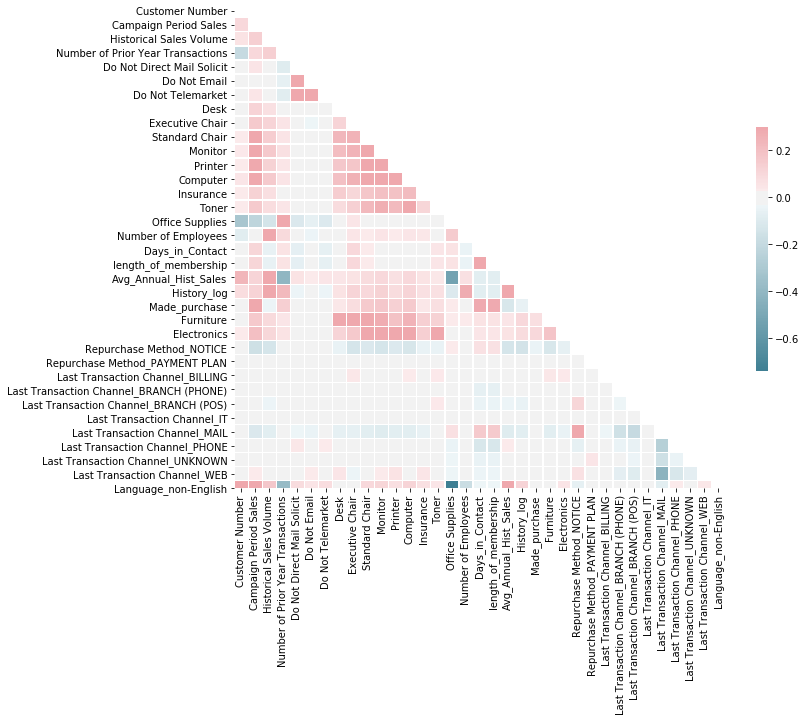

In [294]:
# Compute the correlation matrix
corr = clean_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [295]:
clean_df.loc[clean_df['Campaign Period Sales'] < 0] = 0
clean_df.loc[clean_df['Historical Sales Volume'] < 0] = 0
clean_df[['Campaign Period Sales', 'Historical Sales Volume', 'Number of Prior Year Transactions']].describe()

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions
count,16168.000000,1.616800e+04,16168.000000
mean,245.840071,6.713209e+05,14.475878
std,719.999064,9.556780e+05,8.036521
min,0.000000,0.000000e+00,0.000000
25%,0.000000,1.900134e+05,8.000000
50%,0.000000,3.962959e+05,16.000000
75%,145.538667,7.871561e+05,20.000000
max,8936.850000,3.441213e+07,313.000000


In [296]:
clean_df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Language_non-English
0,86734.0,238.704762,146803.428571,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,8,18793 days 09:48:51.422053,18793,52,9786.895238,11.896850,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,97098.0,281.680000,439984.160000,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,30,14153 days 09:48:51.422053,14153,39,19999.280000,12.994494,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,100836.0,432.857143,970465.714286,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,8,20954 days 09:48:51.422053,20954,58,51077.142857,13.785531,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,116390.0,0.000000,230193.600000,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,13437 days 09:48:51.422053,13437,37,13540.800000,12.346676,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,127914.0,1370.166667,27403.333333,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,11932 days 09:48:51.422053,11932,33,1304.920635,10.218420,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [297]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [359]:
# predicts = clean_df.drop(['Customer Number',  'Campaign Period Sales', 'Made_purchase', 'Since_First_Purchase',
#                          'Date of First Purchase'],axis=1)

In [453]:
X = clean_df.drop(['Date of First Purchase', 'Since_First_Purchase'], axis=1)

In [454]:
y = clean_df['Made_purchase']

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, stratify=y, random_state=43)

In [456]:
X_train_nsales  = X_train.drop(['Campaign Period Sales','Made_purchase', 'Customer Number'], axis=1)
X_test_nsales = X_test.drop(['Campaign Period Sales','Made_purchase', 'Customer Number'], axis=1)

In [457]:
y_train_regression = X_train['Campaign Period Sales']
y_test_regression = X_test['Campaign Period Sales']

In [458]:
X_train_regress  = X_train.drop('Campaign Period Sales', axis=1)
X_test_regress = X_test.drop('Campaign Period Sales', axis=1)

In [459]:
params = {'max_depth': [i for i in range (2,15)], 'min_samples_split': [i for i in range(4,10)]}


In [460]:
grid = GridSearchCV(RandomForestClassifier(n_estimators= 100), param_grid=params, cv=10)


In [461]:
grid.fit(X_train_nsales, y_train)
grid.best_params_

{'max_depth': 14, 'min_samples_split': 7}

In [462]:
grid.score(X_test_nsales,y_test)

0.867392380009896

In [463]:
forest = RandomForestClassifier(n_estimators=100, max_depth=14, min_samples_split=7)
forest.fit(X_train_nsales, y_train)
forest.score(X_test_nsales, y_test)

0.866031667491341

In [464]:
lr = LogisticRegression()
lr.fit(X_train_nsales,y_train)
lr.score(X_test_nsales, y_test)

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7293419099455715

In [602]:
dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(X_train_nsales, y_train)
dtree.score(X_test_nsales, y_test)

0.8638050470064325

In [608]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = X_test_nsales.columns

graph = Source(tree.export_graphviz(dtree, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [609]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dtree, 
 out_file=dot_data, 
 class_names=y_test, # the target names.
 feature_names=X_test_nsales, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

ValueError: Length of feature_names, 8084 does not match number of features, 32

In [466]:
tree_res = pd.DataFrame({'feature': X_train_nsales.columns, 'importance': dtree.feature_importances_})
tree_res.sort_values('importance', ascending=False)

,feature,importance
15,Days_in_Contact,0.751842
16,length_of_membership,0.050366
8,Monitor,0.050158
17,Avg_Annual_Hist_Sales,0.047967
1,Number of Prior Year Transactions,0.045869
14,Number of Employees,0.008764
9,Printer,0.004779
18,History_log,0.004600
0,Historical Sales Volume,0.004477
21,Repurchase Method_NOTICE,0.004388


In [467]:
X_train['Probability'] = forest.predict_proba(X_train_nsales)[:,1]

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [468]:
X_test['Probability'] = forest.predict_proba(X_test_nsales)[:,1]

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [469]:
X_test

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Language_non-English,Probability
5238,11787214.0,114.773333,111904.000000,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,20497,56,7460.266667,11.625397,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.783257
6876,15397033.0,169.849333,276514.714667,11.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,3,15598,43,25137.701333,12.530019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.679366
9552,21315497.0,3671.833333,396558.000000,4.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,9266,26,99139.500000,12.890578,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0.269298
14386,32562973.0,121.573333,84736.613333,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,9904,27,4984.506667,11.347303,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.683268
7984,17817079.0,0.000000,843261.760000,22.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,3,8918,25,38330.080000,13.645033,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.072964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,21802074.0,0.000000,279706.666667,10.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,8401,23,27970.666667,12.541497,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0.190179
6021,13503579.0,257.485714,710660.571429,20.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,8,9890,27,35533.028571,13.473950,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0.586484
13369,30100368.0,0.000000,6100.114286,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,8,10683,30,2033.371429,8.716063,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.064878
11286,25177457.0,0.000000,28228.933333,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,11702,32,1485.733333,10.248103,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.342344


In [470]:
import scikitplot as skplt
predict_probas = forest.predict_proba(X_test_nsales)
predict = forest.predict(X_test_nsales)

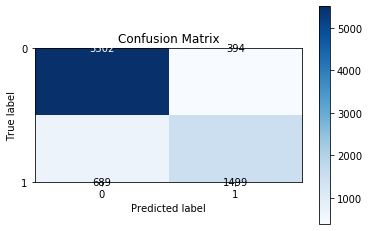

In [471]:
skplt.metrics.plot_confusion_matrix(y_test, predict)

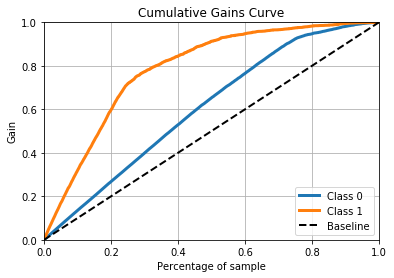

In [472]:
skplt.metrics.plot_cumulative_gain(y_test, predict_probas)

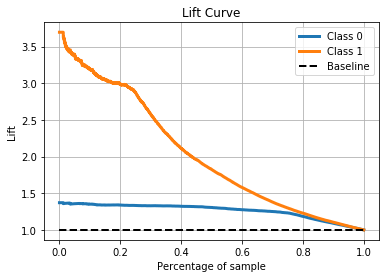

In [473]:
# model better at predicting non buyers than buyers
skplt.metrics.plot_lift_curve(y_test, predict_probas)
plt.legend(loc = 'upper right')

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


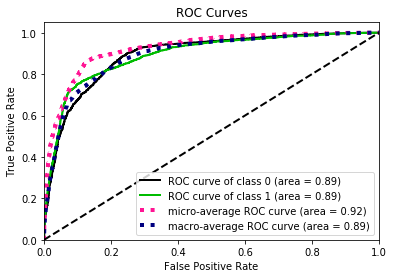

In [474]:
skplt.metrics.plot_roc_curve(y_test, predict_probas)

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


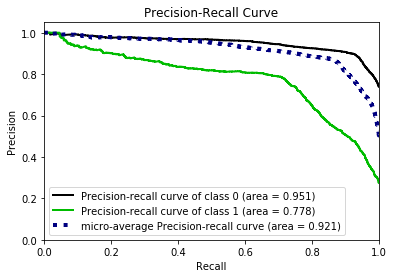

In [475]:
skplt.metrics.plot_precision_recall_curve(y_test, predict_probas)

In [421]:
#E(profit) = 0.22 * prob_sale * est_transaction_size - 8.40 * proba_sale - 45.65

In [202]:
# clean_df2 = clean_df.loc[clean_df['Campaign Period Sales'] > 0]

In [230]:
# predicts = clean_df2.drop(['Customer Number','Campaign Period Sales','Date of First Purchase', 'Since_First_Purchase',
#                           'Made_purchase', 'Repurchase Method_PAYMENT PLAN', 'Do Not Email','Executive Chair', 'Desk', 'Printer', 'Last Transaction Channel_UNKNOWN', 
#                            'Last Transaction Channel_WEB','Last Transaction Channel_IT', 
#                            'Last Transaction Channel_BRANCH (PHONE)', 'Insurance'],  axis=1)

In [231]:
# X = predicts
# y = clean_df2['Campaign Period Sales']

In [232]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,  random_state=42)

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [432]:
X_train_nsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 4646 to 14160
Data columns (total 33 columns):
Customer Number                            8084 non-null float64
Historical Sales Volume                    8084 non-null float64
Number of Prior Year Transactions          8084 non-null float64
Do Not Direct Mail Solicit                 8084 non-null float64
Do Not Email                               8084 non-null float64
Do Not Telemarket                          8084 non-null float64
Desk                                       8084 non-null int64
Executive Chair                            8084 non-null int64
Standard Chair                             8084 non-null int64
Monitor                                    8084 non-null int64
Printer                                    8084 non-null int64
Computer                                   8084 non-null int64
Insurance                                  8084 non-null int64
Toner                                      8084 non-null i

In [476]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train_regress, y_train_regression)
dtree.score(X_test_regress, y_test_regression)

0.7885002543297446

In [478]:
tree_res = pd.DataFrame({'feature': X_train_regress.columns, 'importance': dtree.feature_importances_})
tree_res.sort_values('importance', ascending=False).head(20)

,feature,importance
15,Number of Employees,0.469246
20,Made_purchase,0.311506
18,Avg_Annual_Hist_Sales,0.066265
2,Number of Prior Year Transactions,0.062597
16,Days_in_Contact,0.023627
0,Customer Number,0.015683
1,Historical Sales Volume,0.009279
23,Repurchase Method_NOTICE,0.009256
17,length_of_membership,0.006194
21,Furniture,0.006183


In [479]:
grid = GridSearchCV(RandomForestRegressor(n_estimators= 100), param_grid=params, cv=10)

In [480]:
forest = RandomForestRegressor(random_state=42,n_estimators=100)
forest.fit(X_train_regress, y_train_regression)
forest.score(X_test_regress, y_test_regression)

0.8752026357757302

In [ ]:
forest.predict()

In [481]:
# The differing scales of the raw data may impact these algorithms. 
# Part of a requirement for a standardised data set is to have each attribute have a mean value of zero 
# and a standard deviation of 1. I implement standardisation using pipelines. 
# I then use cross-validation to validate performance of algorithms in totality.

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train_regress, y_train_regression, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -248688.969464 (44213.917046)
ScaledLASSO: -248475.785061 (44079.494628)
ScaledEN: -268812.819816 (52684.966371)
ScaledKNN: -240980.742861 (34378.570938)
ScaledCART: -98618.975376 (39211.177727)
ScaledGBM: -60091.534073 (11505.593711)


C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

ScaledRFR: -65569.014348 (20321.141417)


In [482]:
# From the output above, it looks like the Gradient Boosting Regressor operforms the best using a scaled version of the data. 
# From this point onward, I will build the regression algorithm using the Gradient Boosting Regressor. 
# The GBM will be tested with a few n_estimators using the GridSearchCV function.

from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train_regress)
rescaledX = scaler.transform(X_train_regress)
param_grid = dict(n_estimators=np.array([50,100,200,300,400,1000]))
model = GradientBoostingRegressor(random_state=42)
kfold = KFold(n_splits=10, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train_regression)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-62408.481227 (12218.414791) with: {'n_estimators': 50}
-60297.867593 (11569.467570) with: {'n_estimators': 100}
-61794.566315 (13363.277549) with: {'n_estimators': 200}
-63355.858114 (14715.206026) with: {'n_estimators': 300}
-64105.763597 (15221.491339) with: {'n_estimators': 400}
-67334.299925 (16991.531438) with: {'n_estimators': 1000}
Best: -60297.867593 using {'n_estimators': 100}


In [491]:
# The best n_estimator configuration is 100 with the negative mean square error closest to 0.

# Finalise and validate model
# There's a need to standardise the training and test data before putting them through the GBR model.

from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train_regress)
rescaled_X_train = scaler.transform(X_train_regress)
model = GradientBoostingRegressor(random_state=42, n_estimators=100)
model.fit(rescaled_X_train, y_train_regression)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test_regress)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test_regression, predictions))

66717.86016472442


In [543]:
# From the mean square error of 0.046 between the prediction outputs vs the test data, 
# the GBR performed well. Important to note that the mean_square_error is calculated using the scaled data. 
# It does not represent the error between the actual house prices and predicted prices. 
# To better appreciate the outcome of the predictions, I look at the raw predicted values and the corresponding test data.

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test_regression})
compare.head()

,Prediction,Test Data
5238,196.897161,114.773333
6876,319.956215,169.849333
9552,1965.746997,3671.833333
14386,283.772444,121.573333
7984,-0.912178,0.000000


In [494]:
model.score(rescaled_X_test ,y_test_regression)

0.8711676622600713

In [546]:
X_test['Pred_Sale'] = predictions

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [548]:
X_test.head(10)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Language_non-English,Probability,Pred_Sale
5238,11787214.0,114.773333,111904.000000,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,20497,56,7460.266667,11.625397,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.783257,196.897161
6876,15397033.0,169.849333,276514.714667,11.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,3,15598,43,25137.701333,12.530019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.679366,319.956215
9552,21315497.0,3671.833333,396558.000000,4.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,9266,26,99139.500000,12.890578,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0.269298,1965.746997
14386,32562973.0,121.573333,84736.613333,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,9904,27,4984.506667,11.347303,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.683268,283.772444
7984,17817079.0,0.000000,843261.760000,22.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,3,8918,25,38330.080000,13.645033,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.072964,-0.912178
9252,20641634.0,0.000000,652048.948571,19.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,8,10972,30,34318.365714,13.387875,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.126517,1.294724
3281,7450815.0,0.000000,206921.074286,19.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,1,8,6019,17,10890.582857,12.240093,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.181445,-3.067053
4821,10882675.0,217.609600,115550.697600,9.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,3,14976,41,12838.966400,11.657465,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.784800,357.764672
7794,17326594.0,0.000000,157205.428571,15.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,8,8460,23,10480.361905,11.965309,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.078158,-6.024619
4413,9946468.0,0.000000,137543.466667,7.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,30,10256,28,19649.066667,11.831695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.250918,-2.673926


In [560]:
X_test['Profit'] = 0.22 * X_test['Probability'] * X_test['Pred_Sale'] - 8.40 * X_test['Probability'] - 45.65
#E(profit) = 0.22 * prob_sale * est_transaction_size - 8.40 * proba_sale - 45.65

C:\Users\bukasa_r\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [561]:
X_test.head(100)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Language_non-English,Probability,Pred_Sale,Profit
5238,11787214.0,114.773333,1.119040e+05,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,20497,56,7460.266667,11.625397,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.783257,196.897161,-18.300730
6876,15397033.0,169.849333,2.765147e+05,11.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,3,15598,43,25137.701333,12.530019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.679366,319.956215,-3.535873
9552,21315497.0,3671.833333,3.965580e+05,4.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,9266,26,99139.500000,12.890578,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0.269298,1965.746997,68.549530
14386,32562973.0,121.573333,8.473661e+04,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3,9904,27,4984.506667,11.347303,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.683268,283.772444,-8.733093
7984,17817079.0,0.000000,8.432618e+05,22.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,3,8918,25,38330.080000,13.645033,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.072964,-0.912178,-46.277536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10263,22936867.0,0.000000,5.127417e+05,10.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,2593,7,51274.166667,13.147527,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.223641,0.329572,-47.512373
6898,15439420.0,0.000000,1.046753e+05,7.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,8,10911,30,14953.615238,11.558619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.041636,-4.352110,-46.039609
1239,3081989.0,272.504762,1.798531e+05,20.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,8,4070,11,8992.657143,12.099896,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.238193,334.398488,-30.127490
5864,13129933.0,0.000000,2.185690e+05,1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,13041,36,218569.000000,12.294857,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.040388,-1.793412,-46.005193


In [562]:
X_test['Decile'] = pd.qcut(X_test['Profit'],10, labels=[str(i) for i in range(1,11)])


In [572]:
X_test.to_csv('C:\\Users\\bukasa_r\\Documents\\new stuff\\X_test.csv')

In [571]:
pd.pivot_table(X_test, index=['Decile'], values=['Probability', 'Pred_Sale', 'Profit', 'Customer Number'],
        aggfunc = {'Customer Number': ['count'],
                   'Probability': ['mean'],
                   'Pred_Sale': ['mean'],
                   'Profit': ['mean']})

# ldf = pd.pivot_table(lift_df, index =['decile'], values= ['purchase', 'not_purchase', 'prob'],
#                     aggfunc = {'purchase': ['sum'],
#                               'not_purchase': ['sum'],
#                               'prob': ['min', 'max']})

,Customer Number,Pred_Sale,Probability,Profit
,count,mean,mean,mean
Decile,,,,
1,809,-17.063806,0.467821,-51.742663
2,808,-2.990704,0.196901,-47.389393
3,808,-0.267070,0.144524,-46.835282
4,809,-1.385392,0.102621,-46.506813
5,808,-1.320560,0.081007,-46.327880
6,808,0.606537,0.067163,-46.181624
7,809,4.955169,0.049030,-45.973343
8,808,283.743688,0.238272,-34.109510


In [590]:
y_test.array

<PandasArray>
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
 ...
 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
Length: 8084, dtype: int32